### Question 5 [10 points]

Reproduce in Figure 2b. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import fsspec

import xarray as xr
xr.set_options(display_style="html")  # display dataset nicely

import warnings
warnings.simplefilter("ignore")  # filter some warning messages

# code features from https://scitools.org.uk/cartopy/docs/v0.14/matplotlib/feature_interface.html
crs = ccrs.PlateCarree()  # set projection

ds = xr.open_dataset("~/shared/climate-data/ds_hw.nc")
ds

<xarray.Dataset>
Dimensions:           (time: 6443, lat: 251, lon: 234)
Coordinates:
  * lat               (lat) float32 33.0 33.06 33.12 33.18 ... 47.88 47.94 48.0
  * lon               (lon) float32 -132.0 -131.9 -131.9 ... -118.1 -118.0
  * time              (time) datetime64[ns] 2002-06-01T09:00:00 ... 2020-01-2...
Data variables:
    analysed_sst      (time, lat, lon) float32 ...
    analysis_error    (time, lat, lon) float32 ...
    mask              (time, lat, lon) float32 ...
    sea_ice_fraction  (time, lat, lon) float32 ...
Attributes: (12/47)
    Conventions:                CF-1.7
    Metadata_Conventions:       Unidata Observation Dataset v1.0
    acknowledgment:             Please acknowledge the use of these data with...
    cdm_data_type:              grid
    comment:                    MUR = "Multi-scale Ultra-high Resolution"
    creator_email:              ghrsst@podaac.jpl.nasa.gov
    ...                         ...
    summary:                    A merged, multi-sensor L4 Foundation SST anal...
    time_coverage_end:          20200116T210000Z
    time_coverage_start:        20200115T210000Z
    title:                      Daily MUR SST, Final product
    uuid:                       27665bc0-d5fc-11e1-9b23-0800200c9a66
    westernmost_longitude:      -180.0

In [2]:
# set a function to calculate SST anomalies
def set_anomalies(ds):
    climatology = ds.groupby('time.dayofyear').mean('time')
    anomalies = ds.groupby('time.dayofyear') - climatology
    return anomalies
#select 'analysed_sst' variable
anomalies = set_anomalies(ds['analysed_sst'])

In [3]:
# figure 2b is maximum anomaly month

# The location and timing of the maximum SST anomalies between June 2002 and July 2016 are shown in Figure 2.
start_date = pd.Timestamp('2002-06-01')
end_date = pd.Timestamp('2016-07-31')
time2002_2016 = ds.analysed_sst.sel(time=slice(start_date, end_date))
sst_max = time2002_2016.groupby(time2002_2016.time.dt.dayofyear).max(skipna=True)

#The maximum 5 day average SST anomaly at each location during 2002 to July 2016, relative to the 2002–2012 climatology
start_date2 = pd.Timestamp('2002')
end_date2 = pd.Timestamp('2012')
time2002_2012 = ds.analysed_sst.sel(time=slice(start_date2, end_date2))
sst_mean = time2002_2012.groupby(time2002_2012.time.dt.dayofyear).mean(skipna=True)

anomalies_max = anomalies.idxmax(dim='time').dt.month

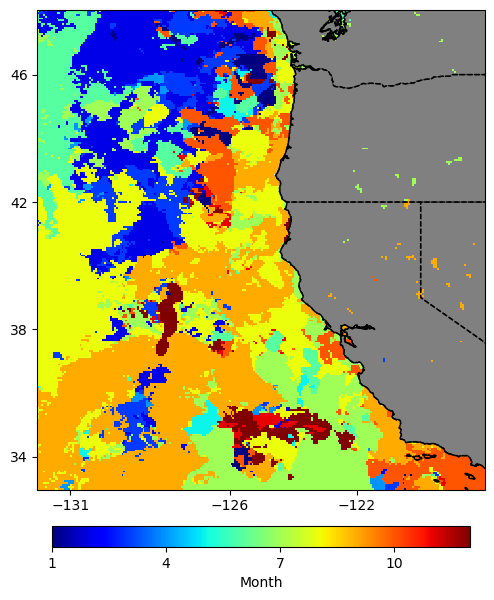

In [5]:
# plot
fig, ax = plt.subplots(figsize=(12, 7), subplot_kw={'projection': crs})

ax.coastlines(resolution='10m', color='k')
ax.add_feature(cfeature.LAND, facecolor='gray')
ax.add_feature(cfeature.BORDERS, linestyle='-', edgecolor='k')
ax.add_feature(cfeature.STATES, linestyle='--', edgecolor='k')

anomalies_map = anomalies_max.plot(x='lon',y='lat',cmap='jet',transform=crs, add_colorbar=False)


xticks=[-131,-126,-122]
ax.set_xlabel("")
ax.set_xticks(xticks)
yticks=range(34,47,4)
ax.set_ylabel("")
ax.set_yticks(yticks)


cbar = plt.colorbar(anomalies_map,ax=ax,location='bottom', shrink=0.45, pad=0.03,orientation="horizontal",fraction=0.08,anchor=(0.5,0.1))
cbar.set_label('Month')
cbar.set_ticks([1, 4, 7,10])

plt.savefig('Q5')
plt.show()